<a href="https://colab.research.google.com/github/Anish32/loan-app/blob/main/Loan_Approval_Pred_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
data = pd.read_csv('loan_approval_dataset.csv')

In [5]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
data.drop(columns = ['loan_id'], inplace=True)

In [4]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [6]:
data.columns = data.columns.str.strip()

In [7]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [8]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [9]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

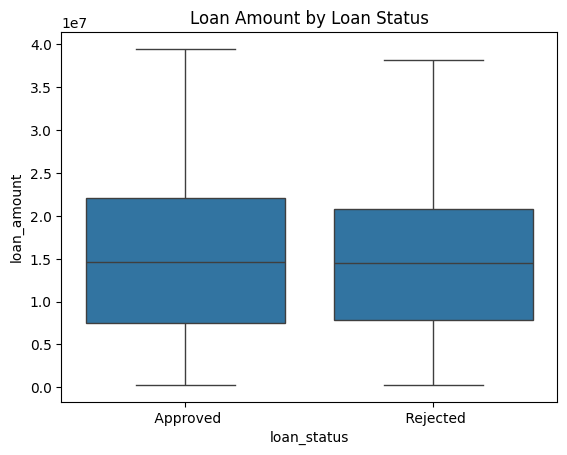

In [11]:
sns.boxplot(x='loan_status', y='loan_amount', data=data)
plt.title('Loan Amount by Loan Status')
plt.show()

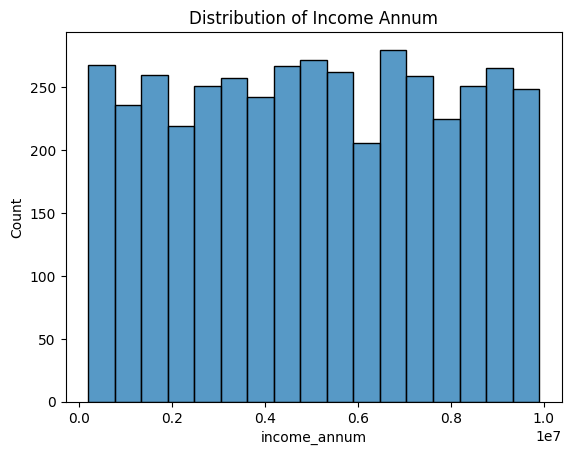

In [12]:
sns.histplot(data['income_annum'])
plt.title('Distribution of Income Annum')
plt.show()

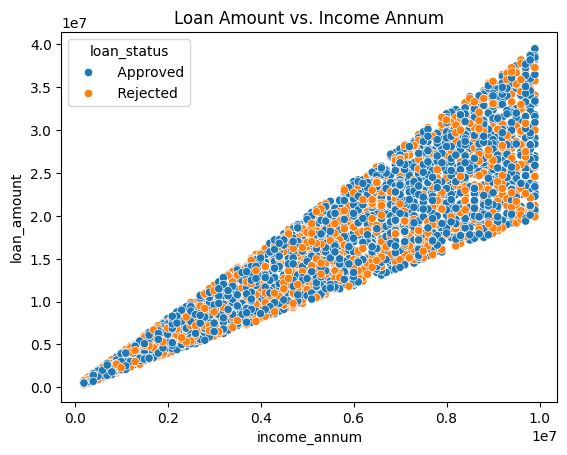

In [13]:
sns.scatterplot(x='income_annum', y='loan_amount', data=data, hue='loan_status')
plt.title('Loan Amount vs. Income Annum')
plt.show()

In [14]:
data['Assets'] = data.residential_assets_value + data.commercial_assets_value+data.luxury_assets_value + data.bank_asset_value

In [15]:
data.drop(columns = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'], inplace = True)

In [16]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,Rejected,7400000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,Approved,20000000
4266,2,Not Graduate,No,6500000,23900000,18,457,Rejected,39000000
4267,1,Not Graduate,No,4100000,12800000,8,780,Approved,28800000


In [17]:
data.isnull().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
loan_status,0
Assets,0


In [18]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,Rejected,7400000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,Approved,20000000
4266,2,Not Graduate,No,6500000,23900000,18,457,Rejected,39000000
4267,1,Not Graduate,No,4100000,12800000,8,780,Approved,28800000


In [19]:
data.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [20]:
def clean_data(st):
    st = st.strip()
    return st

In [21]:
clean_data(' Graduate')

'Graduate'

In [22]:
data.education = data.education.apply(clean_data)

In [23]:
data.education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [24]:
data['education'] = data['education'].replace(['Graduate', 'Not Graduate'],[1,0])

<ipython-input-24-7c9149ef7d84>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['education'] = data['education'].replace(['Graduate', 'Not Graduate'],[1,0])


In [25]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,1,No,9600000,29900000,12,778,Approved,50700000
1,0,0,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,1,No,9100000,29700000,20,506,Rejected,57700000
3,3,1,No,8200000,30700000,8,467,Rejected,52700000
4,5,0,Yes,9800000,24200000,20,382,Rejected,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1,Yes,1000000,2300000,12,317,Rejected,7400000
4265,0,0,Yes,3300000,11300000,20,559,Approved,20000000
4266,2,0,No,6500000,23900000,18,457,Rejected,39000000
4267,1,0,No,4100000,12800000,8,780,Approved,28800000


In [26]:
data.self_employed.unique()

array([' No', ' Yes'], dtype=object)

In [27]:
data.self_employed = data.self_employed.apply(clean_data)

In [28]:
data.self_employed.unique()

array(['No', 'Yes'], dtype=object)

In [29]:
data.self_employed = data.self_employed.replace(['No', 'Yes'],[0,1])

<ipython-input-29-a5f9be13468d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.self_employed = data.self_employed.replace(['No', 'Yes'],[0,1])


In [30]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,1,0,9600000,29900000,12,778,Approved,50700000
1,0,0,1,4100000,12200000,8,417,Rejected,17000000
2,3,1,0,9100000,29700000,20,506,Rejected,57700000
3,3,1,0,8200000,30700000,8,467,Rejected,52700000
4,5,0,1,9800000,24200000,20,382,Rejected,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,Rejected,7400000
4265,0,0,1,3300000,11300000,20,559,Approved,20000000
4266,2,0,0,6500000,23900000,18,457,Rejected,39000000
4267,1,0,0,4100000,12800000,8,780,Approved,28800000


In [31]:
data.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [32]:
data.loan_status = data.loan_status.apply(clean_data)

In [33]:
data.loan_status.unique()

array(['Approved', 'Rejected'], dtype=object)

In [34]:
data.loan_status = data.loan_status.replace(['Approved', 'Rejected'],[1,0])

<ipython-input-34-acb56089b9ef>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.loan_status = data.loan_status.replace(['Approved', 'Rejected'],[1,0])


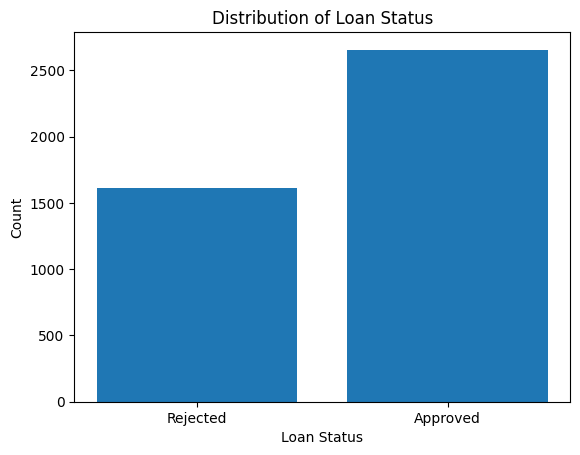

In [35]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
loan_status_counts = data['loan_status'].value_counts()

# Create a bar plot
plt.bar(loan_status_counts.index, loan_status_counts.values)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Distribution of Loan Status")
plt.xticks(loan_status_counts.index, ['Approved', 'Rejected'])  # Replace 1, 0 with labels
plt.show()

In [36]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,1,0,9600000,29900000,12,778,1,50700000
1,0,0,1,4100000,12200000,8,417,0,17000000
2,3,1,0,9100000,29700000,20,506,0,57700000
3,3,1,0,8200000,30700000,8,467,0,52700000
4,5,0,1,9800000,24200000,20,382,0,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,0,7400000
4265,0,0,1,3300000,11300000,20,559,1,20000000
4266,2,0,0,6500000,23900000,18,457,0,39000000
4267,1,0,0,4100000,12800000,8,780,1,28800000


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
input_data = data.drop(columns=['loan_status'])
output_data = data['loan_status']

In [39]:
input_data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Assets
0,2,1,0,9600000,29900000,12,778,50700000
1,0,0,1,4100000,12200000,8,417,17000000
2,3,1,0,9100000,29700000,20,506,57700000
3,3,1,0,8200000,30700000,8,467,52700000
4,5,0,1,9800000,24200000,20,382,55000000
...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,7400000
4265,0,0,1,3300000,11300000,20,559,20000000
4266,2,0,0,6500000,23900000,18,457,39000000
4267,1,0,0,4100000,12800000,8,780,28800000


In [40]:
output_data

,loan_status
0,1
1,0
2,0
3,0
4,0
...,...
4264,0
4265,1
4266,0
4267,1


In [41]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data, test_size=0.2)

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3415, 8), (854, 8), (3415,), (854,))

In [43]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [44]:
x_test_scaled = scaler.transform(x_test)

In [45]:
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Naive Bayes', GaussianNB()),
]


In [46]:
accuracy_scores = []  # Initialize an empty list to store accuracy scores

for name, classifier in classifiers:
    # Train the classifier
    classifier.fit(x_train, y_train)

    # Make predictions
    y_pred = classifier.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store the accuracy score
    accuracy_scores.append((name, accuracy))  # Append a tuple of (name, accuracy)

    # Print results
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{class_report}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")


Classifier: Logistic Regression
Accuracy: 0.7775175644028103
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.55      0.65       316
           1       0.77      0.91      0.84       538

    accuracy                           0.78       854
   macro avg       0.78      0.73      0.74       854
weighted avg       0.78      0.78      0.77       854

Confusion Matrix:
[[173 143]
 [ 47 491]]

Classifier: Decision Tree
Accuracy: 0.9824355971896955
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       316
           1       0.99      0.98      0.99       538

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
[[310   6]
 [  9 529]]

Classifier: Random Forest
Accuracy: 0.9730679156908665
Classification Report:
              precisio

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

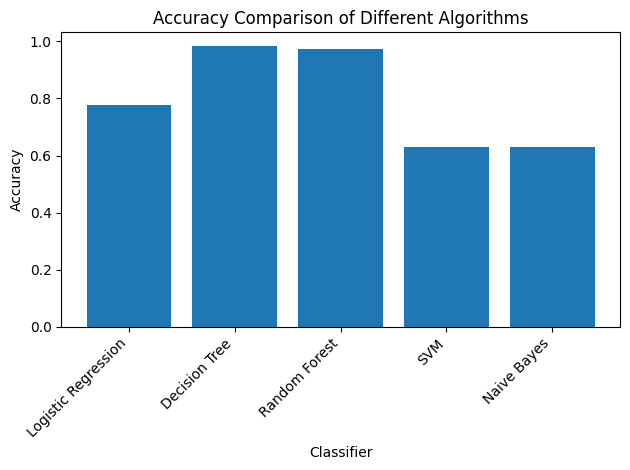

In [47]:
names, accuracies = zip(*accuracy_scores)
plt.bar(names, accuracies)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Algorithms")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [57]:
best_algorithm, best_accuracy = max(accuracy_scores, key=lambda item: item[1])
for name, classifier in classifiers:
    if name == best_algorithm:
        model = classifier  # Assign the best classifier to 'model'
        break
# Print the best algorithm and its accuracy
print(f"Best Algorithm: {best_algorithm}")
print(f"Accuracy: {best_accuracy}")

Best Algorithm: Decision Tree
Accuracy: 0.9824355971896955


In [58]:
pred_data = pd.DataFrame([['2','1','0','9600000','29900000','12','778','50700000']],columns=['no_of_dependents','education','self_employed','income_annum','loan_amount','loan_term','cibil_score','Assets'])

In [59]:
pred_data = scaler.transform(pred_data)

In [60]:
model.predict(pred_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [52]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.8 MB/s eta 0:00:00


In [61]:
import pickle as pk

In [62]:
pk.dump(model, open('model.pkl','wb'))

In [63]:
pk.dump(scaler,open('scaler.pkl','wb'))

In [64]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load the model and scaler
model = pickle.load(open('model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

st.title('Loan Prediction App')

# Input fields for features
no_of_dependents = st.slider('Number of Dependents', 0, 5)
education = st.selectbox('Education', ['Not Graduate', 'Graduate'])
self_employed = st.selectbox('Self Employed?', ['No', 'Yes'])
income_annum = st.number_input('Annual Income')
loan_amount = st.number_input('Loan Amount')
loan_term = st.slider('Loan Term (Years)', 0, 20)
cibil_score = st.slider('CIBIL Score', 0, 1000)
Assets = st.slider('Total Assets Value', 0, 100000000)

# Convert categorical features to numerical
education_mapping = {'Not Graduate': 0, 'Graduate': 1}
self_employed_mapping = {'No': 0, 'Yes': 1}
education_num = education_mapping[education]
self_employed_num = self_employed_mapping[self_employed]

# Create a DataFrame for prediction
input_data = pd.DataFrame([[no_of_dependents, education_num, self_employed_num, income_annum, loan_amount, loan_term, cibil_score, Assets]],
                         columns=['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'Assets'])

# Function to create and download predicted dataset
def download_predicted_data(input_data, prediction):
    """Creates a DataFrame with input data and prediction, and provides a download link."""
    predicted_df = input_data.copy()
    predicted_df['loan_status_prediction'] = prediction
    csv = predicted_df.to_csv(index=False).encode('utf-8')

    # Provide download button with clear action
    st.download_button(
        label="Download Predicted Data as CSV",  # Clear label
        data=csv,
        file_name='predicted_loan_data.csv',
        mime='text/csv',
        key='download_button'  # Unique key for the button
    )
    st.markdown("**Click the button above to download the predicted data.**")  # Clear instruction


# Make prediction
if st.button('Predict'):
    # Scale the input data
    scaled_data = scaler.transform(input_data)

    prediction = model.predict(scaled_data)

    # Display prediction
    if prediction[0] == 1:
        st.success('Loan is Approved')
    else:
        st.error('Loan is Rejected (Low CIBIL Score)')

    # Download predicted data
    download_predicted_data(input_data, prediction)

Writing app.py


In [67]:
%%writefile requirements.txt
pandas
numpy
matplotlib
seaborn
scikit-learn
streamlit

Writing requirements.txt


In [68]:
import pandas as pd
import pickle

# Load the model and scaler
model = pickle.load(open('model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

# Sample input data (replace with your desired values)
input_data = pd.DataFrame([
    [2, 1, 0, 9600000, 29900000, 12, 778, 50700000],
    [1, 0, 1, 5000000, 15000000, 8, 650, 25000000],
    # Add more rows as needed
], columns=['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'Assets'])

# Scale the input data
scaled_data = scaler.transform(input_data)

# Make predictions
predictions = model.predict(scaled_data)

# Create predicted dataset
predicted_df = input_data.copy()
predicted_df['loan_status_prediction'] = predictions

# Save to CSV
predicted_df.to_csv('predicted_loan_data.csv', index=False)

print("Predicted dataset saved to 'predicted_loan_data.csv'")

Predicted dataset saved to 'predicted_loan_data.csv'


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [66]:
!wget -q -O - ipv4.icanhazip.com

35.204.151.195


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸

⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.169.52.69:8501

your url is: https://eighty-eyes-jam.loca.lt
  Stopping...
^C
